In [16]:
from dress_hem_length import dress_type
from dress_hem_type import hem_type
from dress_sleeve_length import sleeve_length
from create_bbox import bounding_box
from convert_gray import conv_gray
from human_pose_est import general_pose_model

mask_filename C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder\out_image_000.jpg
[INFO]Pose estimation.


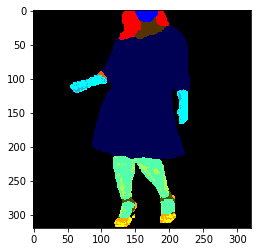

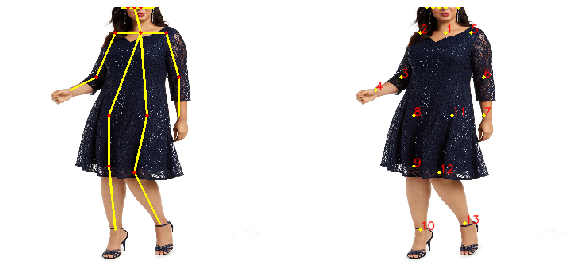

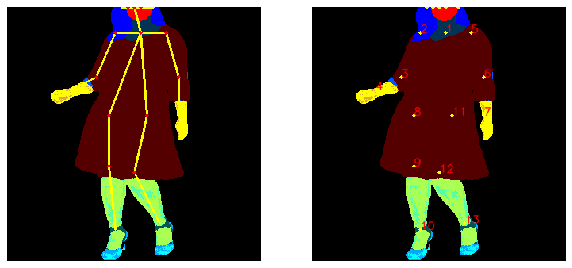

Type of Dress: Below knee Dress
Type of sleeves: bracelet sleeves
0
Type of Hem: Aline
mask_filename C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder\out_image_001.jpg
[INFO]Pose estimation.


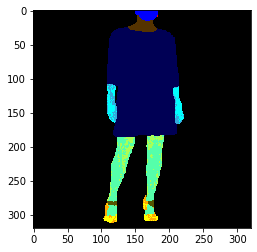

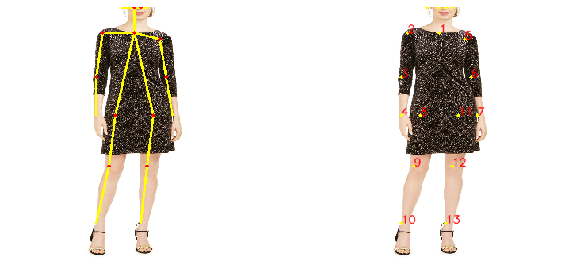

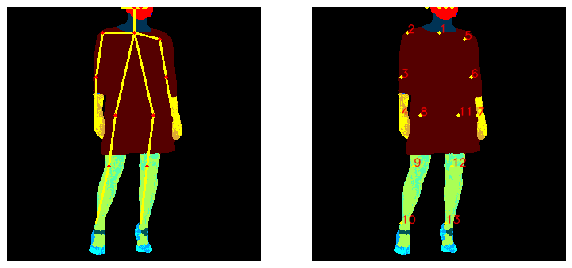

Type of Dress: Mini Dress
Type of sleeves: bracelet sleeves
0
type of Hem: straight
mask_filename C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder\out_image_002.jpg
[INFO]Pose estimation.


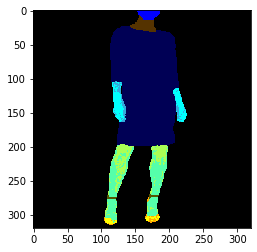

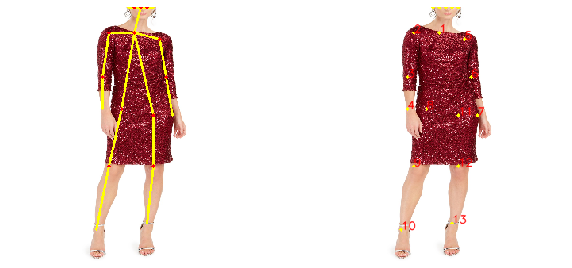

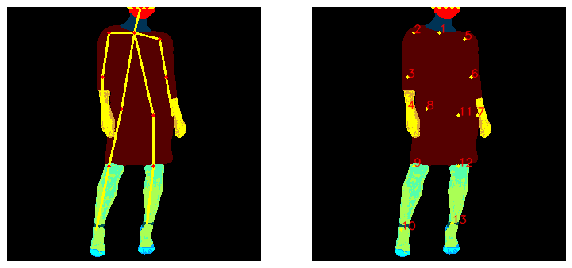

Type of Dress:  knee Dress
Type of sleeves: bracelet sleeves
0
type of Hem: straight
mask_filename C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder\out_image_003.jpg
[INFO]Pose estimation.


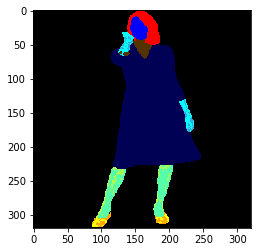

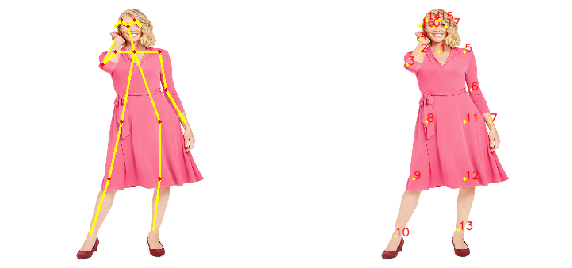

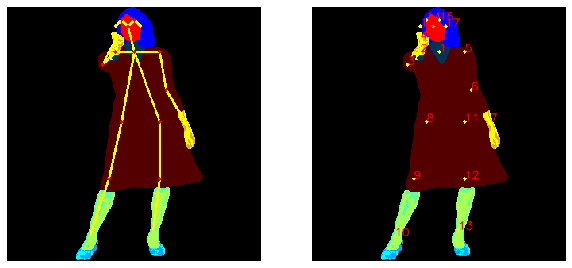

Type of Dress: Below knee Dress
Type of sleeves: bracelet sleeves
0
Type of Hem: Aline
mask_filename C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder\out_image_004.jpg
[INFO]Pose estimation.


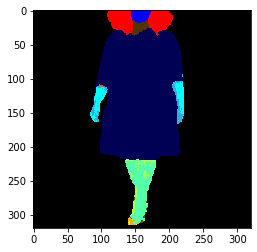

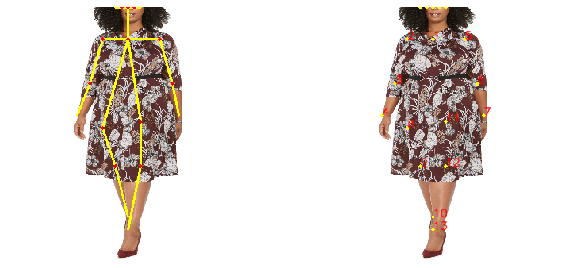

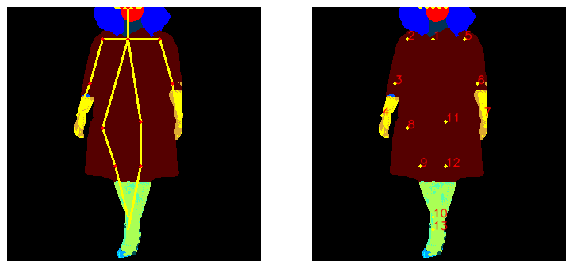

Type of Dress: Below knee Dress
Type of sleeves: bracelet sleeves
0
Type of Hem: Aline
mask_filename C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder\out_image_005.jpg
[INFO]Pose estimation.


In [ ]:

mask_img_id_file = r'C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\mask_images_id.csv'
img_id_file = r'C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\images_id.csv'

mask_images_folder = r'C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Mask_images\New folder'
orig_images_folder = r'C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Data\Original_images\New folder'
threshold_data = pd.read_csv(r'C:\Users\tmallava\Desktop\Oracle Project\Dress_Datasets\Oracle_data_labels\Dress_length_labels_predicted.csv') #Dress_Length_Ratios_Balanced

with open(mask_img_id_file, 'r') as f:
    mask_names = f.read().splitlines()
with open(img_id_file, 'r') as g:
    orig_names = g.read().splitlines()

for i in range (len(mask_names)):
    mask_name = mask_names[i]
    orig_name = orig_names[i]
    mask_filename = os.path.join(mask_images_folder, mask_name) 
    orig_filename = os.path.join(orig_images_folder, orig_name)
    print("mask_filename", mask_filename)
#     print("orig_filename", orig_filename)
    image_mask = cv2.imread(mask_filename)
    
    thresh,indices = conv_gray (image_mask)
    bound_box= bounding_box(thresh, image_mask)
    print("[INFO]Pose estimation.")
    img_file = orig_filename
    pose_model = general_pose_model()
    res_points = pose_model.predict(img_file)
    pose_model.vis_pose(img_file, res_points)
    mask_imgg = pose_model.vis_pose(mask_filename, res_points)
    predict_hemlength = dress_type(indices, res_points,mask_imgg,threshold_data )
    predict_sleevelength = sleeve_length(res_points,image_mask )
    predict_hemtype = hem_type(image_mask, bound_box, res_points)
